In [1]:
# This code simply loads traces and displays them in a spectrogram and in a plot
# It does not contain any training functions or parameters
# It was created to increase the readability of the main code and to enable the display of the loaded traces (Duh :P)


# This code contains code adapted from Nils Wisiol, sntrup4591761 and ANSSI-FR/ASCAD
# All snippets are marked accordingly as such
# from tqdm import tnrange

# General modules
import sys
from pathlib import Path


# Load data modules
from numpy import empty, zeros, uint16
from numpy.random import RandomState
import chipwhisperer as cw
import numpy as np

# Plot traces
from scipy import signal, fftpack
import matplotlib.pyplot as plt
## Plot zoomed in
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# ASCAD: Adapted by Mahmoud Gharra to fit the NTRU Prime input


# returns traces and labels, as well as some important global meta_data

def load_database(my_database):
    # load traces
    print("++ Loading projects")
    project = cw.open_project(my_database)
    global KEY_LENGTH, TEXT_LENGTH, SAMPLE_HIGH, TRAINING_SLICE, TEST_NUM, TEST_SLICE

    # Organize trace data for MLP
    print("++ Organizing traces")
    KEY_LENGTH = TEXT_LENGTH = project.keys[0].size

    sample_low = 0
    SAMPLE_HIGH = project.trace_manager().num_points() # length of singular trace
    sample_slice = slice(sample_low, SAMPLE_HIGH)
    sample_num = len(project.traces) # number of traces
#     print("sample num: ", sample_num)
    training_num = sample_num - tst_len
    TRAINING_SLICE = slice(0, training_num)

    TEST_NUM = sample_num - training_num
    TEST_SLICE = slice(training_num, TEST_NUM + training_num)
    assert TEST_NUM + training_num <= sample_num
    assert training_num > 3*TEST_NUM

    # organize traces in X matrix
    X = empty(shape=(sample_num, SAMPLE_HIGH - sample_low))
    for i in range(sample_num):
        X[i] = project.waves[i][sample_slice]

    # organize the operands in Y matrix
    y = empty(shape=(sample_num, KEY_LENGTH))
    for i in range(sample_num):
        # reproduce values
        y[i] = project.keys[i]
#         text_num = text_gen(seed=i)[:TEXT_LENGTH]
#         key_num = key_gen(seed=i)[:KEY_LENGTH]
#         y[i][:] = key_num[:]
        #y[i][y[i] > 2**15] -= 2**16

    
    # transform generated key numbers to labels
    y = np.array((y.T[1::2].T*(2**8)) + y.T[::2].T, dtype=np.int16)

    unique = np.unique(y)
    class_dic = dict([[unique[i], i] for i in range(len(unique))])
    y_labelled = np.vectorize(class_dic.get)(y)
    return X, y_labelled


def read_parameters_from_file(param_filename):
    #read parameters for the train_model and load_traces functions
    #TODO: sanity checks on parameters
    param_file = open(param_filename,"r")

    #TODO: replace eval() by ast.linear_eval()
    my_parameters= eval(param_file.read())

    my_database = my_parameters["database"]
    my_database_title = my_parameters["database_title"]
    return my_database_title, my_database



# https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
def four_tr(traces, tmp_i, f_s):
    _Four = fftpack.fft(traces[tmp_i])
    _freqs = fftpack.fftfreq(len(traces[tmp_i])) * f_s
    
    return _Four, _freqs


In [3]:
def sample_traces(unlab_traces):
    
    t = np.arange(unlab_traces.shape[1])
    myTraces = np.array(unlab_traces)

    rand_ind = np.zeros(tot)
    for i in range(tot):
        rand_ind[i] = np.random.randint(myTraces.shape[0])

    # plot traces
    print("++ plot traces")
    fig1, axs1 = plt.subplots(tot)
    fig1.suptitle(DB_title + ": " + str(rand_ind))
    for i in range(tot):
        axs1[i].plot(t, myTraces[int(rand_ind[i])])

    # zoomed in traces plot    
#     print("++ plot zoomed in traces")
#     fig5, axs5 = plt.subplots(2)
#     fig5.suptitle(DB_title + ": " + str(rand_ind))
    
#     for m in range(2):
#         def f(m):
#             axs5[m].plot(t, myTraces[int(rand_ind[m])])
#             axs5[m].set_xlim(m, m+1000)
#         interactive(f, m=(0, 900.0))
        
    
    
    # https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html    
    # frequency plot
    print("++ plot frequencies")
    fig2, axs2 = plt.subplots(tot)
    fig2.suptitle(DB_title + " Freqs: " + str(rand_ind))
    for j in range(tot):
        Four, freqs = four_tr(myTraces, int(rand_ind[j]), f_s)
    #     fig, ax = plt.subplots()
        axs2[-j].stem(freqs, np.abs(Four), use_line_collection=True, linefmt='-', markerfmt=" ")
        
    #     axs2[j].set_xlim(-f_s / 2, f_s / 2)
    #     axs2[j].set_ylim(-5, 110)

    # zoomed in frequency plot
#     print("++  plot frequencies (zoomed in)")
#     fig3, axs3 = plt.subplots(tot)
#     fig3.suptitle(DB_title + " Freqs: " + str(rand_ind))
#     for k in range(tot):
#         Four, freqs = four_tr(myTraces, int(rand_ind[k]), f_s)
#         Four[0] = 0
#         axs3[k].stem(freqs, np.abs(Four), use_line_collection=True, linefmt='-', markerfmt=" ")
#         axs3[k].set_xlim(-10, 10)
#         axs3[k].set_ylim(-1, 10)

    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
#     print("++ plot spectrogram")
#     fig4, axs4 = plt.subplots(tot)
#     fig4.suptitle(DB_title + " sprectrogram: " + str(rand_ind))
#     fig4.axes[-1].set_xlabel('time (sec)')
#     fig4.axes[int(tot/2)].set_ylabel('frequency')

#     for l in range(tot):
#         f, t, Sxx = signal.spectrogram(myTraces[int(rand_ind[l])], f_s)
#         axs4[l].pcolormesh(t, f, Sxx)
# #         axs4[l].set_xlim(-1, 20)


+ Commense loading data
++ Loading projects
++ Organizing traces
++ Data dimestions are:  (13976, 16000)
+ sample 3 traces
++ plot traces
++ plot frequencies


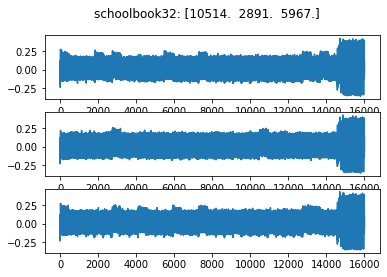

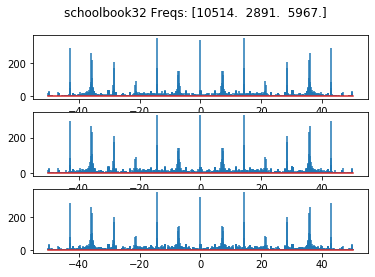

In [4]:
#ASCAD: Adapted by Mahmoud Gharra

# NOTE: code could take another database if it has the same format as the one provided.
# NOTE: you need to make a local directory with the name of your chosen training_model

###################
###################
# Hyper parameters:
###################

tot = 3 # total number of random samples that you'd like to display
f_s = 100 # frequency of data in Hz --- I can't seem to find this value in proj

tst_len = 500 # length of testing set

###################
###################

# if __name__ == "__main__":

if len(sys.argv)!=2:
    #default parameters values
#     my_database = "PRE_MAY_06/projects/operand_scanning_32"
#     DB_title = "operand_scanning_32"

#     my_database = "schoolbook32/schoolbook32"        
    my_database = "../2020_APR_23/polymul32/projects/operand_scanning_32"
    DB_title = "schoolbook32"
    # TRAINING MODEL IS THE FILE, IN WHICH THE DATA SHOULD BE SAVED
else:
    #get parameters from user input
    DB_title, database = read_parameters_from_file(sys.argv[1])

# loads traces
print("+ Commense loading data")
X, y = load_database(my_database)
print("++ Data dimestions are: ", np.array(X).shape)

print("+ sample {0} traces".format(tot))
if tot != 0:
    sample_traces(X)

In [5]:
# It looks like we have PowerLine intereference:
# This should fix it but I can't download matlab...
# I need conda for it, which I also don't have
# -- https://github.com/mrezak/removePLI
# import matlab.engine
# eng = matlab.engine.start_matlab()

In [6]:
# High and low pass filtering https://mne.tools/0.13/auto_tutorials/plot_artifacts_correction_filtering.html

In [7]:
project = cw.open_project(my_database)

print('location (project.location): ', project.location)
print()

print('trace length (project.waves[0].size): ', project.waves[0].size)
print()

print('number of traces (len(project.traces)): ', len(project.traces))
print()
print()

# Iterable for working with only the text in.
# Each item in the iterable is a byte array.
# Supports iterating, indexing, and slicing:
print("project.textins[0].size", project.textins[0].size)
print("project.textins (an iterable of length 64): ", project.textins)
print()
print()

# Iterable for working with only the text out.
# Each item in the iterable is a byte array.
# Supports iterating, indexing, and slicing:
print("project.textouts[0] (always False ... What is it?): ", project.textouts[0])
print()
print()

# An output for all 64 keys with . 
print("num. of keys (project.keys[0].size): ", project.keys[0].size)
print("max index of labelled traces (project.keys.max): ", project.keys.max)
print("number of classes")
print()

keys_set = set(project.keys[0])
print("keys_set = set(project.keys[0]) -- (not well implemented... Assumes all key labels are in first trace):", keys_set)
print("number of classes (based on keys_set) -- (len(keyset)): ", len(keys_set))
print()
print()

print("file name (project.get_filename()): ", project.get_filename())
print()

print("length of singular traces (project.trace_manager().num_points()): ", project.trace_manager().num_points())
print("number total of traces (project.trace_manager().num_traces()): ", project.trace_manager().num_traces())
print()



location (project.location):  /Users/MakRude/Desktop/Edu/TU_Berlin_SS20/Bachelor Thesis/2020_APR_23/polymul32/projects

trace length (project.waves[0].size):  16000

number of traces (len(project.traces)):  13976


project.textins[0].size 64
project.textins (an iterable of length 64):  <chipwhisperer.common.api.ProjectFormat.IndividualIterable object at 0x10601d190>


project.textouts[0] (always False ... What is it?):  None


num. of keys (project.keys[0].size):  64
max index of labelled traces (project.keys.max):  13975
number of classes

keys_set = set(project.keys[0]) -- (not well implemented... Assumes all key labels are in first trace): {0, 1, 255}
number of classes (based on keys_set) -- (len(keyset)):  3


file name (project.get_filename()):  /Users/MakRude/Desktop/Edu/TU_Berlin_SS20/Bachelor Thesis/2020_APR_23/polymul32/projects/operand_scanning_32.cwp

length of singular traces (project.trace_manager().num_points()):  16000
number total of traces (project.trace_manager().num_

In [8]:
# # https://stackoverflow.com/questions/50590175/how-to-create-multiple-plots-with-scrollable-x-axis-with-a-single-slider

# %matplotlib inline
# from ipywidgets import interactive
# import matplotlib.pyplot as plt
# import numpy as np

# def f(m):
#     plt.figure(2)
#     x = np.linspace(0, 1000, num=2000)
#     plt.plot(x,x)
#     #plt.plot(x, m * x)
#     plt.xlim(m, m+100)
#     plt.show()

# interactive(f, m=(0, 900.0))


# def f2(m):
#     t = np.arange(X.shape[1])
#     myTraces = np.array(X)

# #     plt.plot(x,x)
#     plt.plot(t, myTraces[243])
#     plt.xlim(m, m+500)
#     plt.show()

# interactive(f2, m=(0, 4500.0))



# def f3(m):
#     t = np.arange(X.shape[1])
#     myTraces = np.array(X)

# #     plt.plot(x,x)
#     plt.plot(t, myTraces[563])
#     plt.xlim(m, m+500)
#     plt.show()

# interactive(f3, m=(0, 4500.0))



# def f4(m):
#     t = np.arange(X.shape[1])
#     myTraces = np.array(X)

# #     plt.plot(x,x)
#     plt.plot(t, myTraces[1000])
#     plt.xlim(m, m+500)
#     plt.show()

# interactive(f4, m=(0, 4500.0))

In [9]:
# X.shape

In [10]:
# y.shape

In [11]:
# y[1]

In [12]:

# returns traces and labels, as well as some important global meta_data

def load_database2(my_database):
    # load traces
    print("++ Loading projects")
    project = cw.open_project(my_database)
    global KEY_LENGTH, TEXT_LENGTH, SAMPLE_HIGH, TRAINING_SLICE, TEST_NUM, TEST_SLICE

    # Organize trace data for MLP
    print("++ Organizing traces")
    KEY_LENGTH = TEXT_LENGTH = project.keys[0].size

    sample_low = 0
    SAMPLE_HIGH = project.trace_manager().num_points() # length of singular trace
    sample_slice = slice(sample_low, SAMPLE_HIGH)
    sample_num = len(project.traces) # number of traces
#     print("sample num: ", sample_num)
    training_num = sample_num - tst_len
    TRAINING_SLICE = slice(0, training_num)

    TEST_NUM = sample_num - training_num
    TEST_SLICE = slice(training_num, TEST_NUM + training_num)
    assert TEST_NUM + training_num <= sample_num
    assert training_num > 3*TEST_NUM

    # organize traces in X matrix
    X = empty(shape=(sample_num, SAMPLE_HIGH - sample_low))
    for i in range(sample_num):
        X[i] = project.waves[i][sample_slice]

    # organize the operands in Y matrix
    y = empty(shape=(sample_num, KEY_LENGTH))
    for i in range(sample_num):
        # reproduce values
        y[i] = project.keys[i]
#         text_num = text_gen(seed=i)[:TEXT_LENGTH]
#         key_num = key_gen(seed=i)[:KEY_LENGTH]
#         y[i][:] = key_num[:]
        #y[i][y[i] > 2**15] -= 2**16

    
    # transform generated key numbers to labels
    unique = np.unique(y)
    class_dic = dict([[unique[i], i] for i in range(len(unique))])
    y_labelled = np.vectorize(class_dic.get)(y)

    y_orig = y
    return X, y_labelled, y_orig



In [13]:
X_new, y_l, y_or = load_database2(my_database)

++ Loading projects
++ Organizing traces


In [14]:
# X_new.shape

In [15]:
# y_l.shape

In [16]:
# print(y_or.shape)
# print(y_or[0].shape)
# print(y_or[0])

# print()

# print(y_or[1].shape)
# print(y_or[1])

# print()

# print(np.array((y_or[0]*(2**8)) + y_or[1], dtype=int))

In [17]:
print(y_or[0])
# print(y_or[0][0::2])
# print(y_or[0][::2][8]) # even indices
# print(y_or[0][1::2][8]) # odd indices
print(np.array((y_or.T[1::2].T*(2**8)) + y_or.T[::2].T, dtype=np.int16).shape)
print(np.array((y_or.T[1::2].T*(2**8)) + y_or.T[::2].T, dtype=np.int16))

[  0.   0.   1.   0. 255. 255.   0.   0.   0.   0. 255. 255.   0.   0.
   0.   0.   1.   0. 255. 255.   0.   0.   0.   0.   0.   0.   0.   0.
   1.   0.   0.   0.   0.   0.   0.   0.   1.   0. 255. 255.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   1.   0.
   0.   0.   0.   0. 255. 255.   1.   0.]
(13976, 32)
[[ 0  1 -1 ...  0 -1  1]
 [ 0  0  1 ...  0  0  0]
 [ 1  1  0 ...  0  1  1]
 ...
 [ 0  0  0 ...  0 -1  0]
 [-1  0 -1 ...  1  1  0]
 [ 0  1  1 ...  0 -1  0]]


In [18]:
from collections import Counter
print(np.sum(np.array((y_or.T[1::2].T*(2**8)) + y_or.T[::2].T, dtype=np.int16) == -1))
np.array((y_or.T[1::2].T*(2**8)) + y_or.T[::2].T, dtype=np.int16).shape


84260


(13976, 32)

In [19]:
15000 * 32

480000

In [20]:
90180 / 480000

0.187875